In [2]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#IMPORTING DATABASES
death = pd.read_excel('C:\\Users\\Maha Umer Farooq\\Downloads\\CovidDeaths.xlsx')
vac= pd.read_excel('C:\\Users\\Maha Umer Farooq\\Downloads\\CovidVaccinations.xlsx')

In [4]:
death

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85166,ZWE,Africa,Zimbabwe,2021-04-26,38102.0,16.0,34.714,1560.0,3.0,1.000,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85167,ZWE,Africa,Zimbabwe,2021-04-27,38164.0,62.0,41.286,1565.0,5.0,1.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85168,ZWE,Africa,Zimbabwe,2021-04-28,38191.0,27.0,30.143,1565.0,0.0,1.429,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
85169,ZWE,Africa,Zimbabwe,2021-04-29,38235.0,44.0,31.000,1567.0,2.0,1.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [5]:
#TO FIND CARDIOVASC DEATH RATE
cardio=  death.groupby('location')['cardiovasc_death_rate'].mean().reset_index()
cardio.sort_values(by='location')
pak= cardio.loc[cardio.location=='Pakistan']
pak

,location,cardiovasc_death_rate
152,Pakistan,423.031


In [6]:
#TO FIND TOTAL DEATHS IN ANY COUNTRY
total_deaths=  death.groupby('location')['total_deaths'].sum().reset_index()
total_deaths.sort_values(by='location')
x= total_deaths.loc[total_deaths.location=='Pakistan']
x

,location,total_deaths
152,Pakistan,2973292.0


In [7]:
#PEOPLE DIED WHO WERE AGED 65+
age_65= death.groupby('location')['aged_65_older'].sum().reset_index()
age_65.sort_values(by='aged_65_older', ascending=True)
age_65.head(10)
a= age_65.loc[age_65['aged_65_older']>0]
a.ascending=False
a
b=a.loc[a.location=='Pakistan']
I=a.loc[a.location=='India']
print(b,I)

     location  aged_65_older
152  Pakistan       1937.345    location  aged_65_older
91    India       2736.973


In [8]:
#MAKING THE DEATH RATE PERCENTAGE
death['death_percentage']= (death['total_deaths'] / death['total_cases'] * 100)
death_percentage =death.loc[death.location=='India']['death_percentage'].mean()
death_percentage


1.9545151218712553

In [9]:
#MAKING THE PEOPLE WHO GOT INFECTED WITH COVID PERCENTAGE
death['people_got_covid_percentage']= (death['total_cases'] / death['population'] * 100)
allinfected= death.loc[death.location =='China']['people_got_covid_percentage'].max()
allinfected


0.007120982912354784

In [10]:
#MAKING THE PEOPLE WHO GOT VACCINATED PERCENGTAGE
death['people_got_vaccinated_percentage']= (death['total_vaccinations'] / death['population'] * 100)
allvaccinations= death.loc[death.location =='Pakistan']['people_got_vaccinated_percentage'].mean()
allvaccinations

0.3057263676573724

In [11]:
#FINDING THE LIFE EXPECTANCY PERCENTAGES
life= death.loc[death.location =='Pakistan']['life_expectancy'].max()
life

67.27

***1:GRAPHING PAKISTAN AND INDIA:***

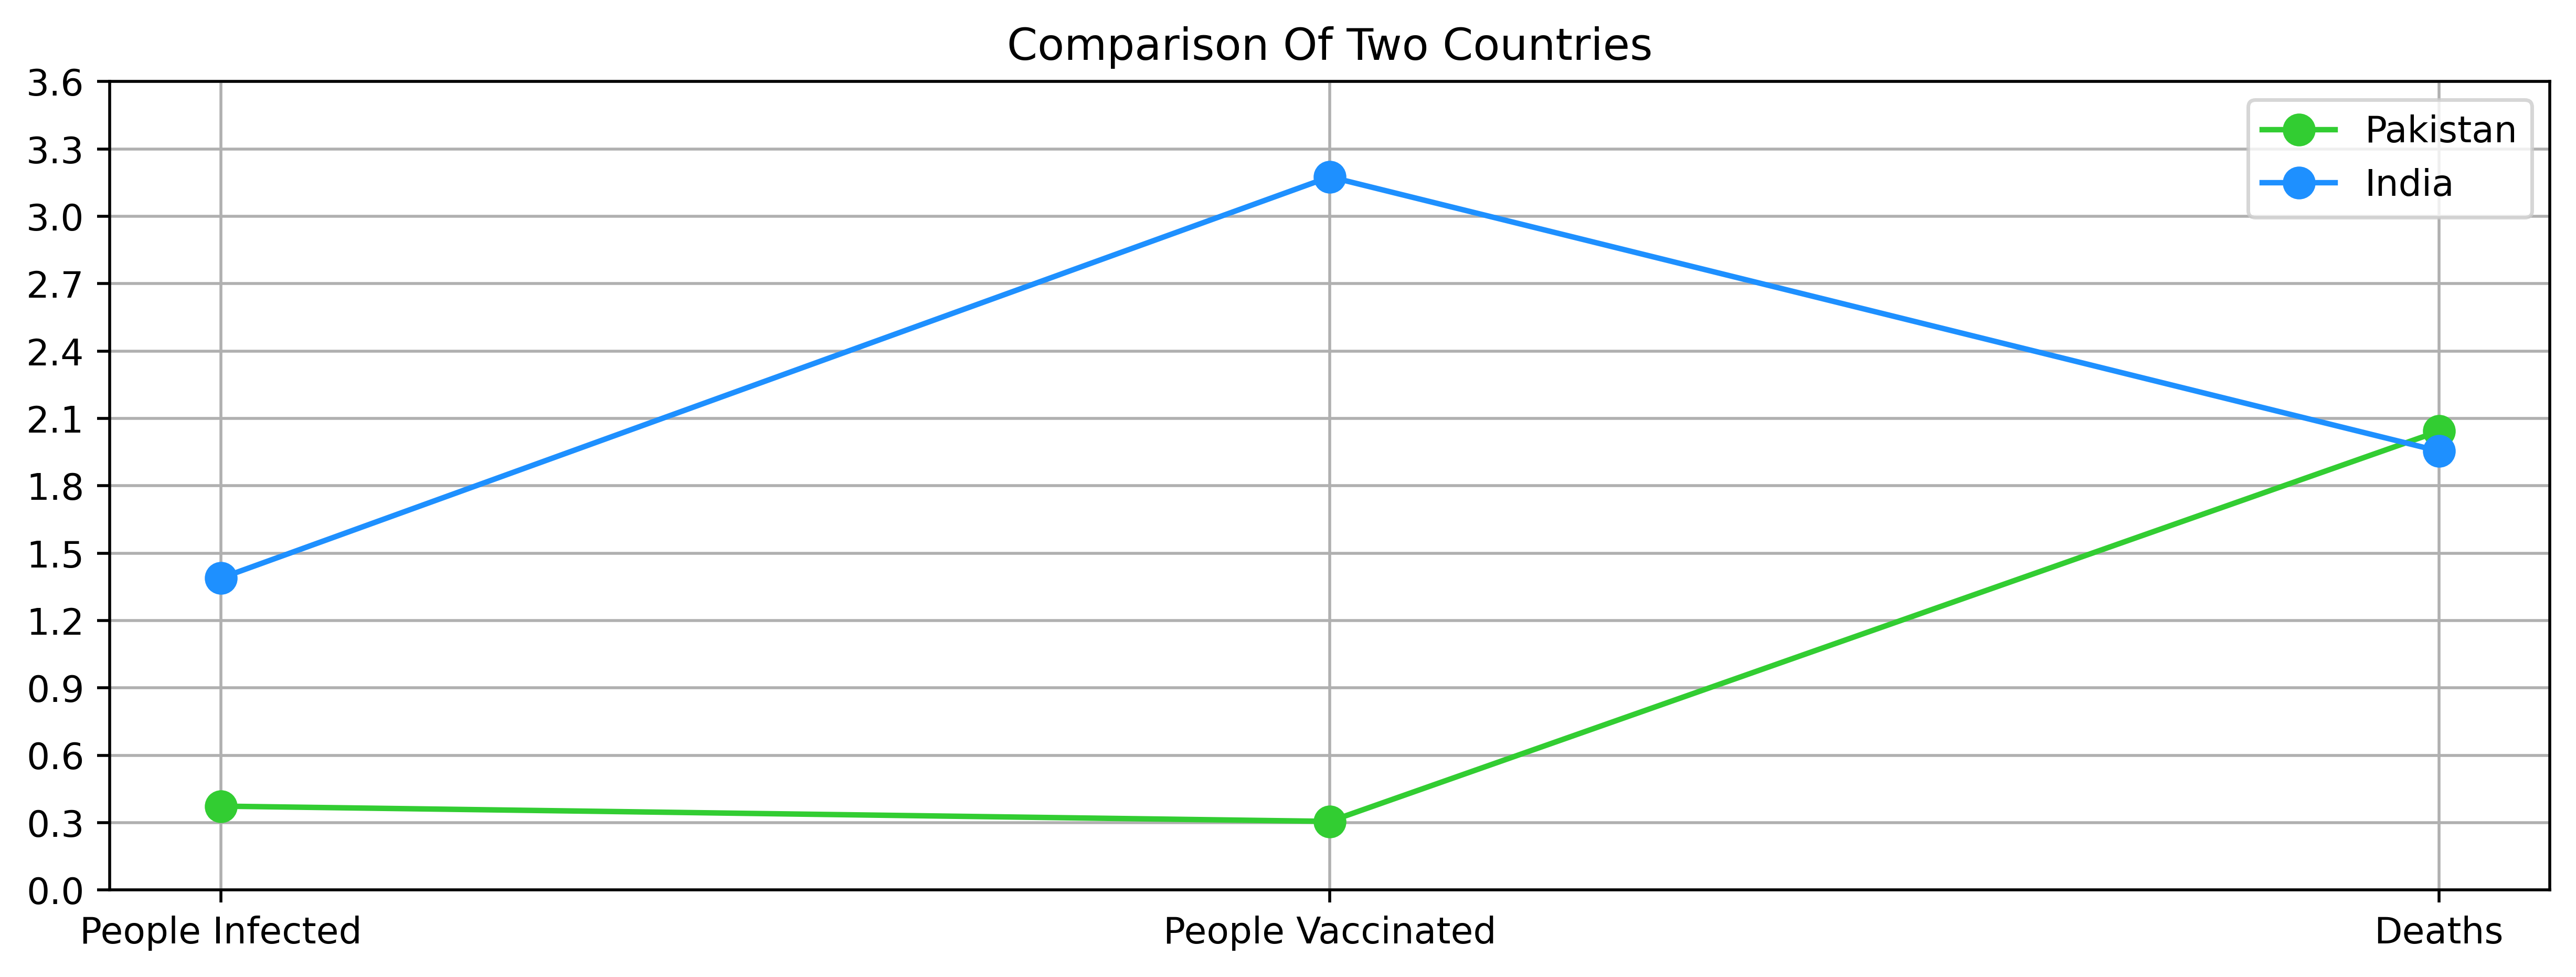

In [12]:
#MAKING GRAPHS FOR PAKISTAN AND INDIA

#data for pakistan
pak1=death.loc[death.location== 'Pakistan']['people_got_covid_percentage'].max()
pak2=death.loc[death.location=='Pakistan']['people_got_vaccinated_percentage'].mean()
pak5=death.loc[death.location=='Pakistan']['death_percentage'].mean()

#plotting
plt.figure(figsize=(12, 4), dpi=500)
plt.plot([pak1,pak2,pak5], marker='o', color='limegreen',markersize=8, label='Pakistan')

#y=[0,20,40,60,80,100]
#------------------------------------------------------------------------------------------------------------------------
#data for india
Ind1=death.loc[death.location== 'India']['people_got_covid_percentage'].max()
Ind2=death.loc[death.location=='India']['people_got_vaccinated_percentage'].mean()
Ind3=death.loc[death.location=='India']['death_percentage'].mean()
plt.plot([Ind1,Ind2,Ind3], marker='o', color='dodgerblue',markersize=8, label='India')

#-----------------------------------------------------------------------------------------------------------------------
#graphing the data
plt.xticks([0,1,2],['People Infected','People Vaccinated','Deaths'])  
plt.yticks([0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4,2.7,3,3.3,3.6])
plt.title('Comparison Of Two Countries')
plt.legend()
plt.grid()
plt.show()    




***2:ENTER THE NAME OF ANY COUNTRY YOU WANT TO GRAPH***

Enter the name of the country: Canada


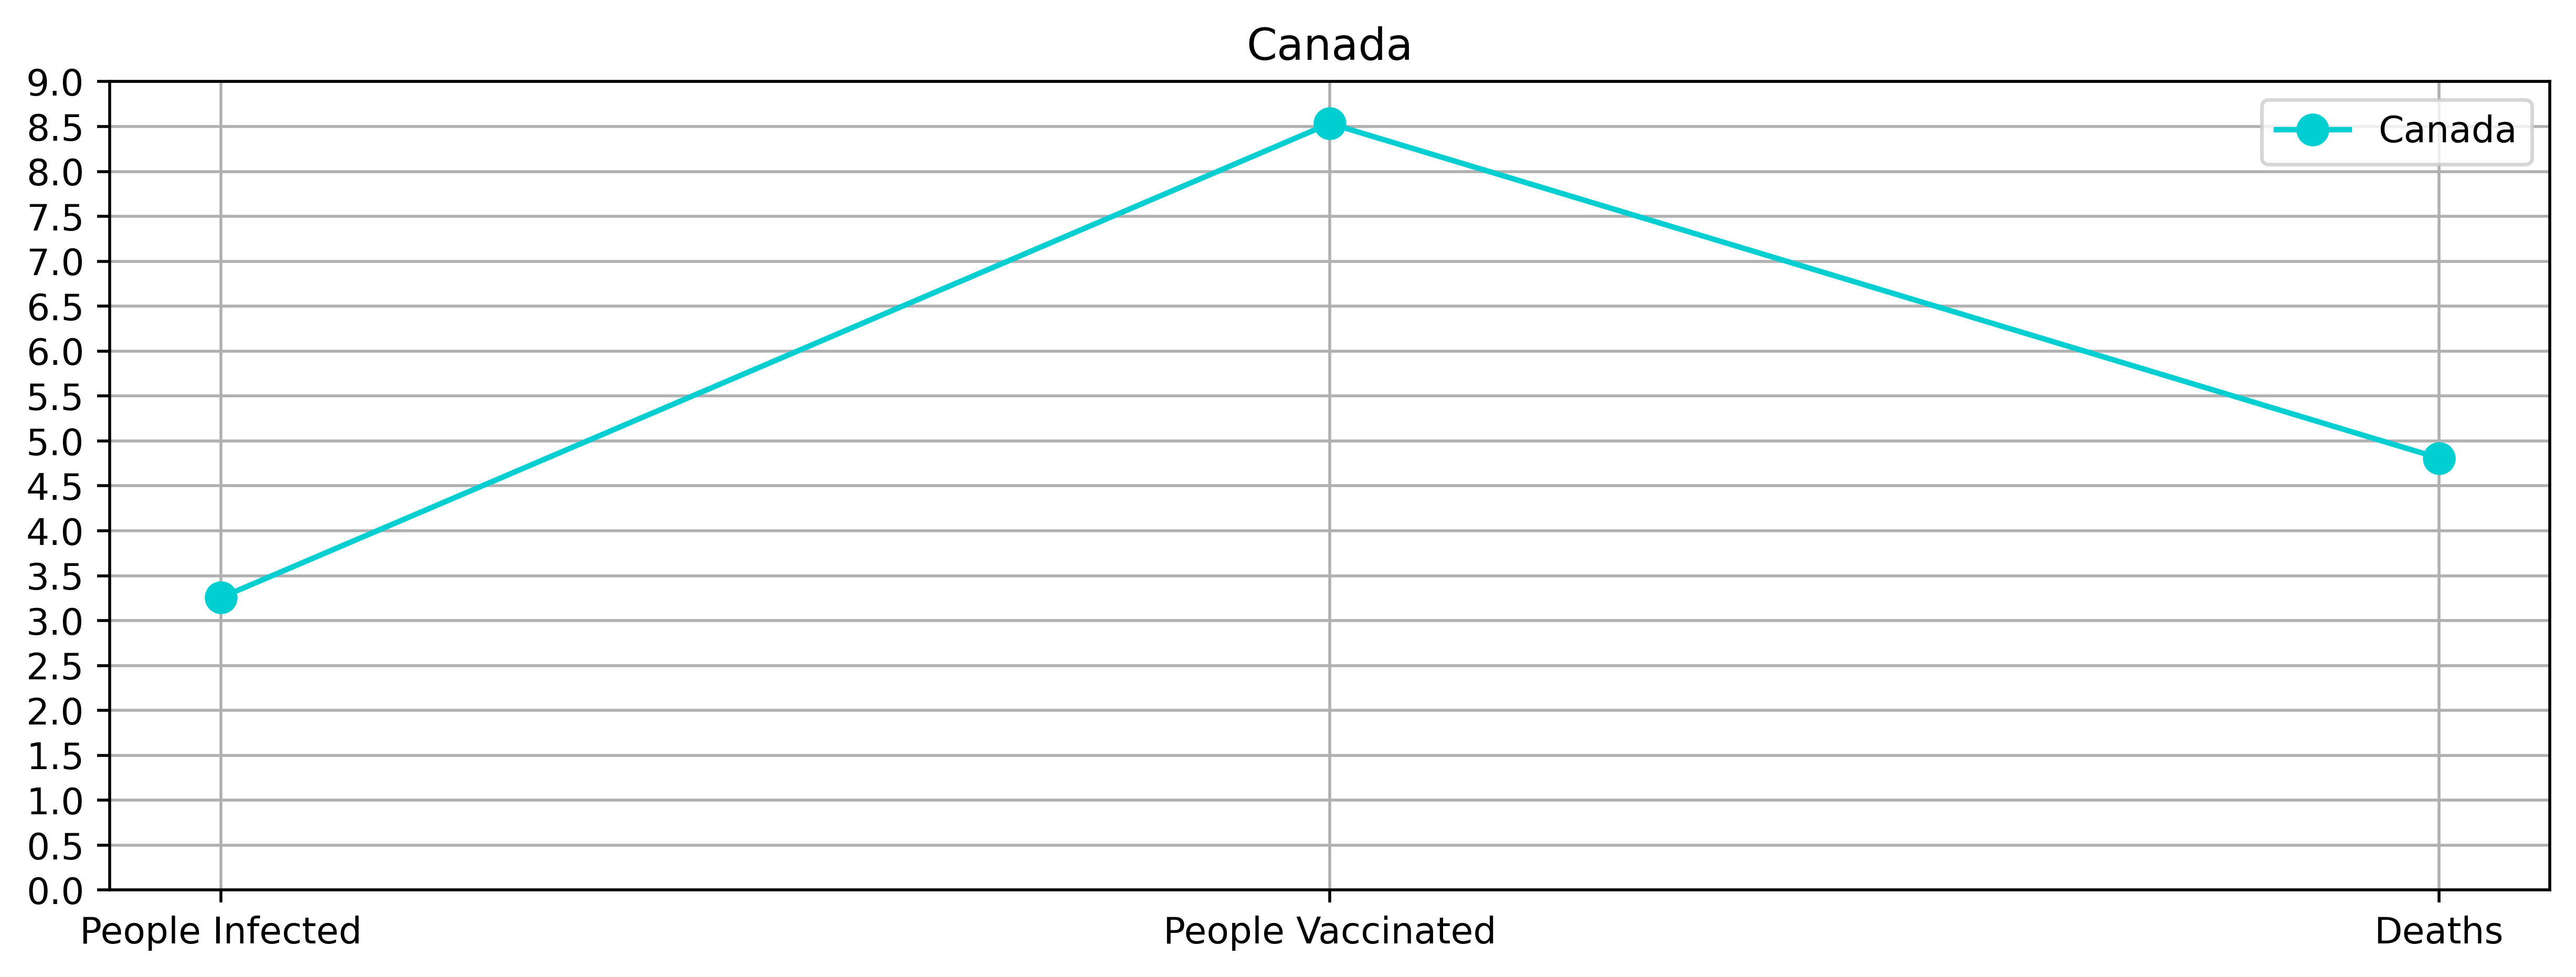

In [18]:
#ENTER THE NAME OF THE COUNTRY TO SEE IT GRAPHICALLY

c= input('Enter the name of the country: ')
z1=death.loc[death.location== c]['people_got_covid_percentage'].max()
z2=death.loc[death.location==c]['people_got_vaccinated_percentage'].mean()
z3=death.loc[death.location==c]['death_percentage'].mean()

#GRAPHING 
plt.figure(figsize=(12, 4), dpi=500)
plt.plot([z1,z2,z3], label=c , marker='o', color='darkturquoise',markersize=8)
plt.xticks([0,1,2],['People Infected','People Vaccinated','Deaths'])  
plt.yticks([0,0.5,1,1.5,2,2.5,3,3.5,4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9])
plt.title(c)
plt.legend()
plt.grid()
plt.show()      



***3:ENTER THE NAME OF THE COUNTRIES TO GRAPH BOTH:***

Enter the name of the country: Russia
Enter the name of the country: Ukraine


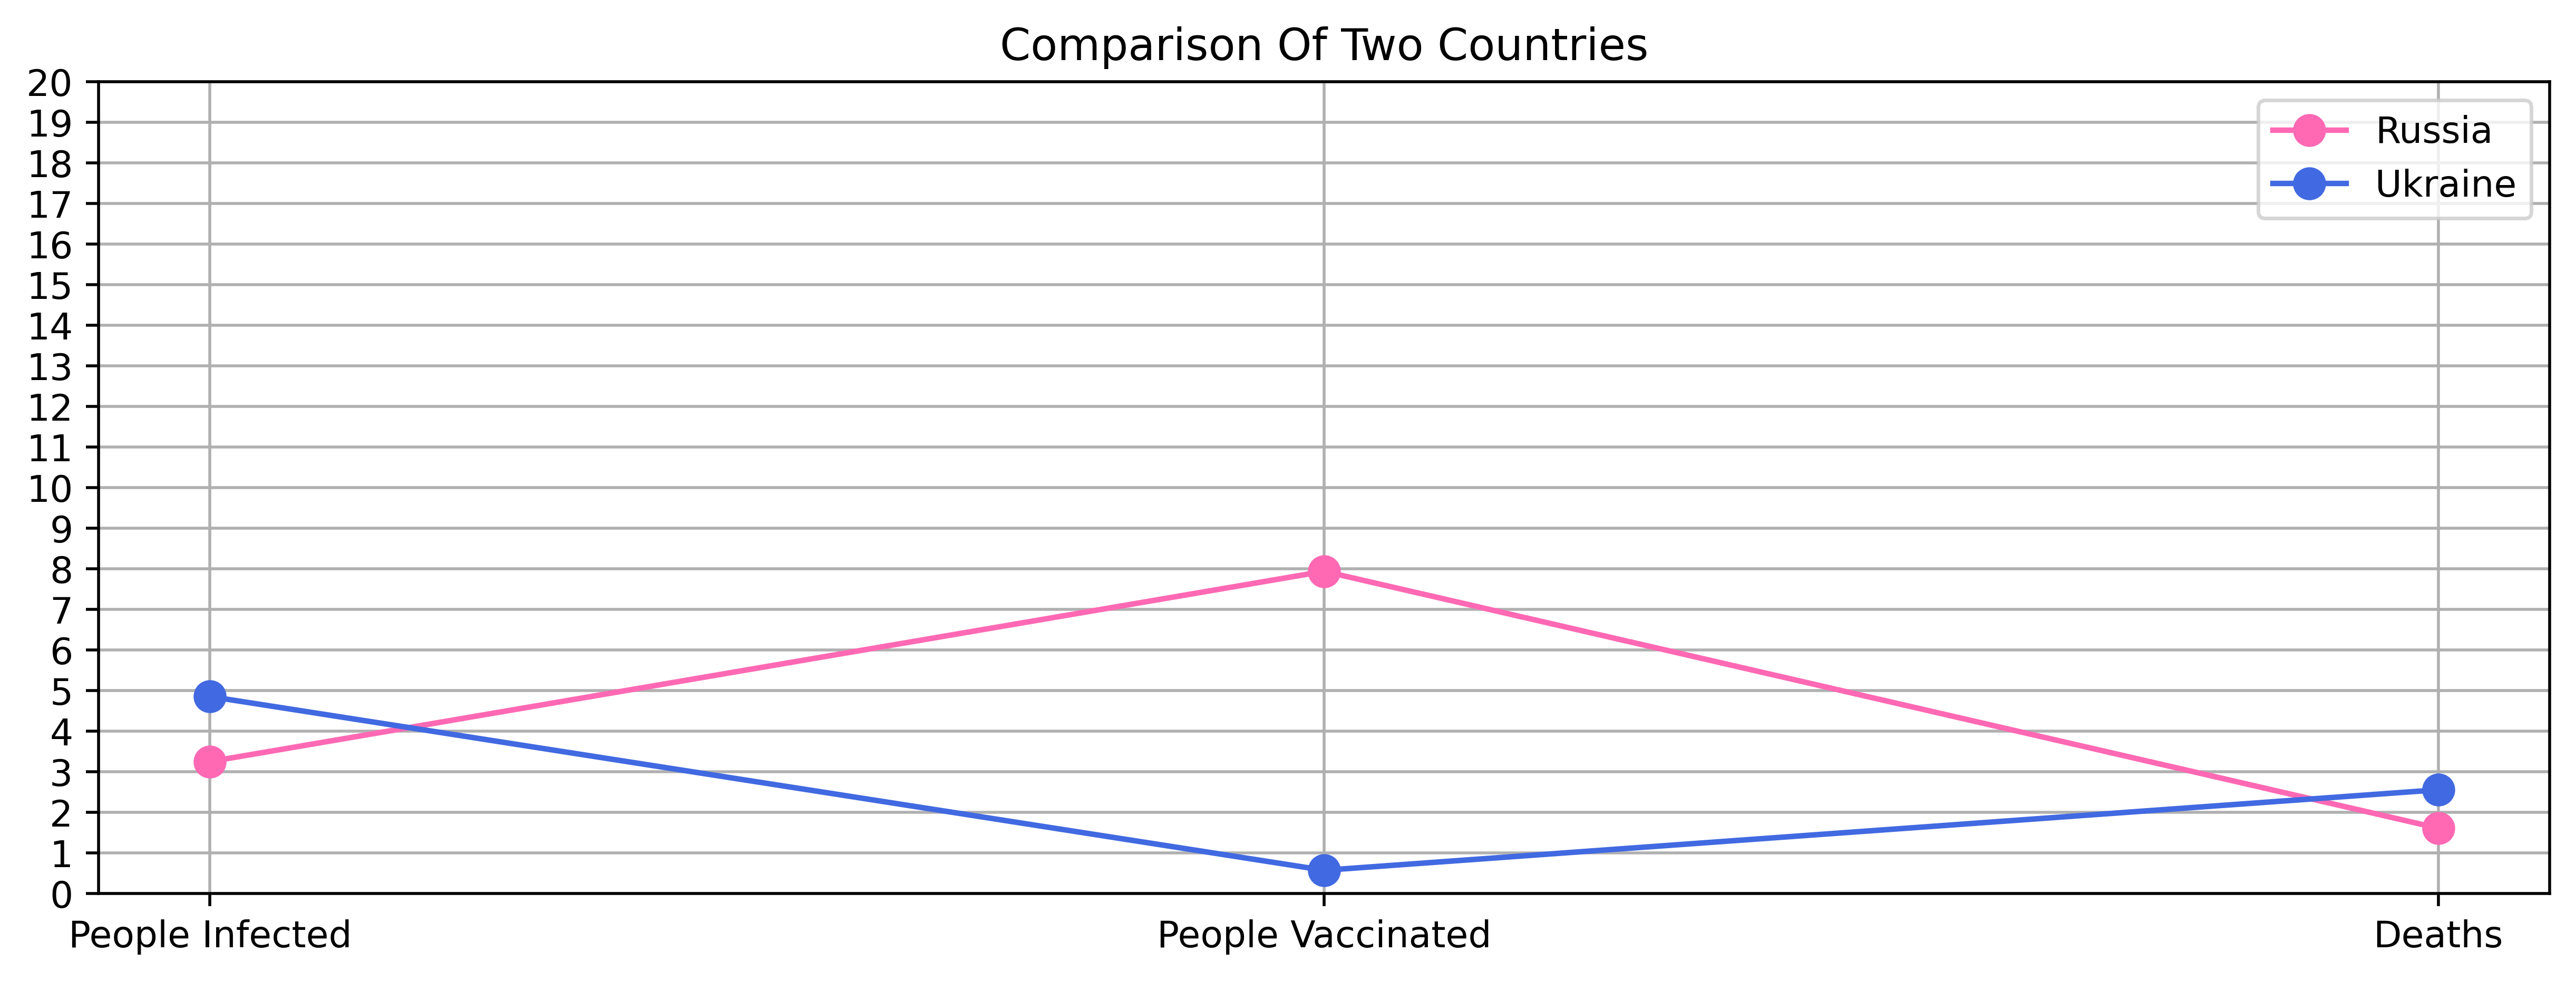

In [19]:
#data
a=input('Enter the name of the country: ')
c1=death.loc[death.location== a]['people_got_covid_percentage'].max()
c2=death.loc[death.location== a]['people_got_vaccinated_percentage'].mean()
c3=death.loc[death.location== a]['death_percentage'].mean()

#plotting
plt.figure(figsize=(12, 4), dpi=500)
plt.plot([c1,c2,c3], marker='o', color='hotpink',markersize=8, label=a)

#y=[0,20,40,60,80,100]
#------------------------------------------------------------------------------------------------------------------------

#data 
b=input('Enter the name of the country: ')
d1=death.loc[death.location== b]['people_got_covid_percentage'].max()
d2=death.loc[death.location== b]['people_got_vaccinated_percentage'].mean()
d3=death.loc[death.location== b]['death_percentage'].mean()
plt.plot([d1,d2,d3], marker='o', color='royalblue',markersize=8, label=b)

#-----------------------------------------------------------------------------------------------------------------------
#graphing the data
plt.xticks([0,1,2],['People Infected','People Vaccinated','Deaths'])  
plt.yticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
plt.title('Comparison Of Two Countries')
plt.legend()
plt.grid()
plt.show()    

***4:IMPORTING VIEWS MADE IN SQL OF THIS DATABASE:***

In [20]:
#IMPORTING VIEWS MADE IN MYSQL DBRAVER OF COVID DATA TO GRAPH THEM.

q3= pd.read_excel('C:\\Users\\Maha Umer Farooq\\OneDrive\\Desktop\\sql queries\\_3_to_find_new_cases_and_new_deaths_in_2020_in_pakistan.xlsx')
q3.dropna(inplace=True)

q4= pd.read_excel('C:\\Users\\Maha Umer Farooq\\OneDrive\\Desktop\\sql queries\\_4_to_find_new_cases_and_new_deaths_in_2021_in_pakistan.xlsx')
q4.dropna(inplace=True)

q5= pd.read_excel('C:\\Users\\Maha Umer Farooq\\OneDrive\\Desktop\\sql queries\\_5_to_find_all_the_deaths_and_cases_recorded_in_all_the_continents.xlsx')
q5.dropna(inplace=True)

q6= pd.read_excel('C:\\Users\\Maha Umer Farooq\\OneDrive\\Desktop\\sql queries\\_6_to_find_the_deaths_in_pakistan_on_the_month_of_september.xlsx')
q6.dropna(inplace=True)

q8= pd.read_excel('C:\\Users\\Maha Umer Farooq\\OneDrive\\Desktop\\sql queries\\_8_these_are_the_top_10_countries_with_the_most_death_rates.xlsx')
q8.dropna(inplace=True)

q9= pd.read_excel('C:\\Users\\Maha Umer Farooq\\OneDrive\\Desktop\\sql queries\\_9_to_find_total_deaths_and_total_cases_recorded_each_day_of_any.xlsx')
q9.dropna(inplace=True)

q1= pd.read_excel('C:\\Users\\Maha Umer Farooq\\OneDrive\\Desktop\\sql queries\\1_to find the people vaccinated in pak.xlsx')
q1.dropna(inplace=True)


***GRAPHING VIEWS MADE IN SQL***

***5:TOP 10 COUNTRIES WITH THE HIGHEST DEATH RATE AFTER GETTING INFECTED:***

C:\Users\Maha Umer Farooq\AppData\Local\Temp\ipykernel_4036\2083423335.py:19: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  x=plt.plot([US,IND,BRA,FRA,UK,SPAIN,ITL,TUR,COL,RUS],'ro', color='crimson', markersize=28)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


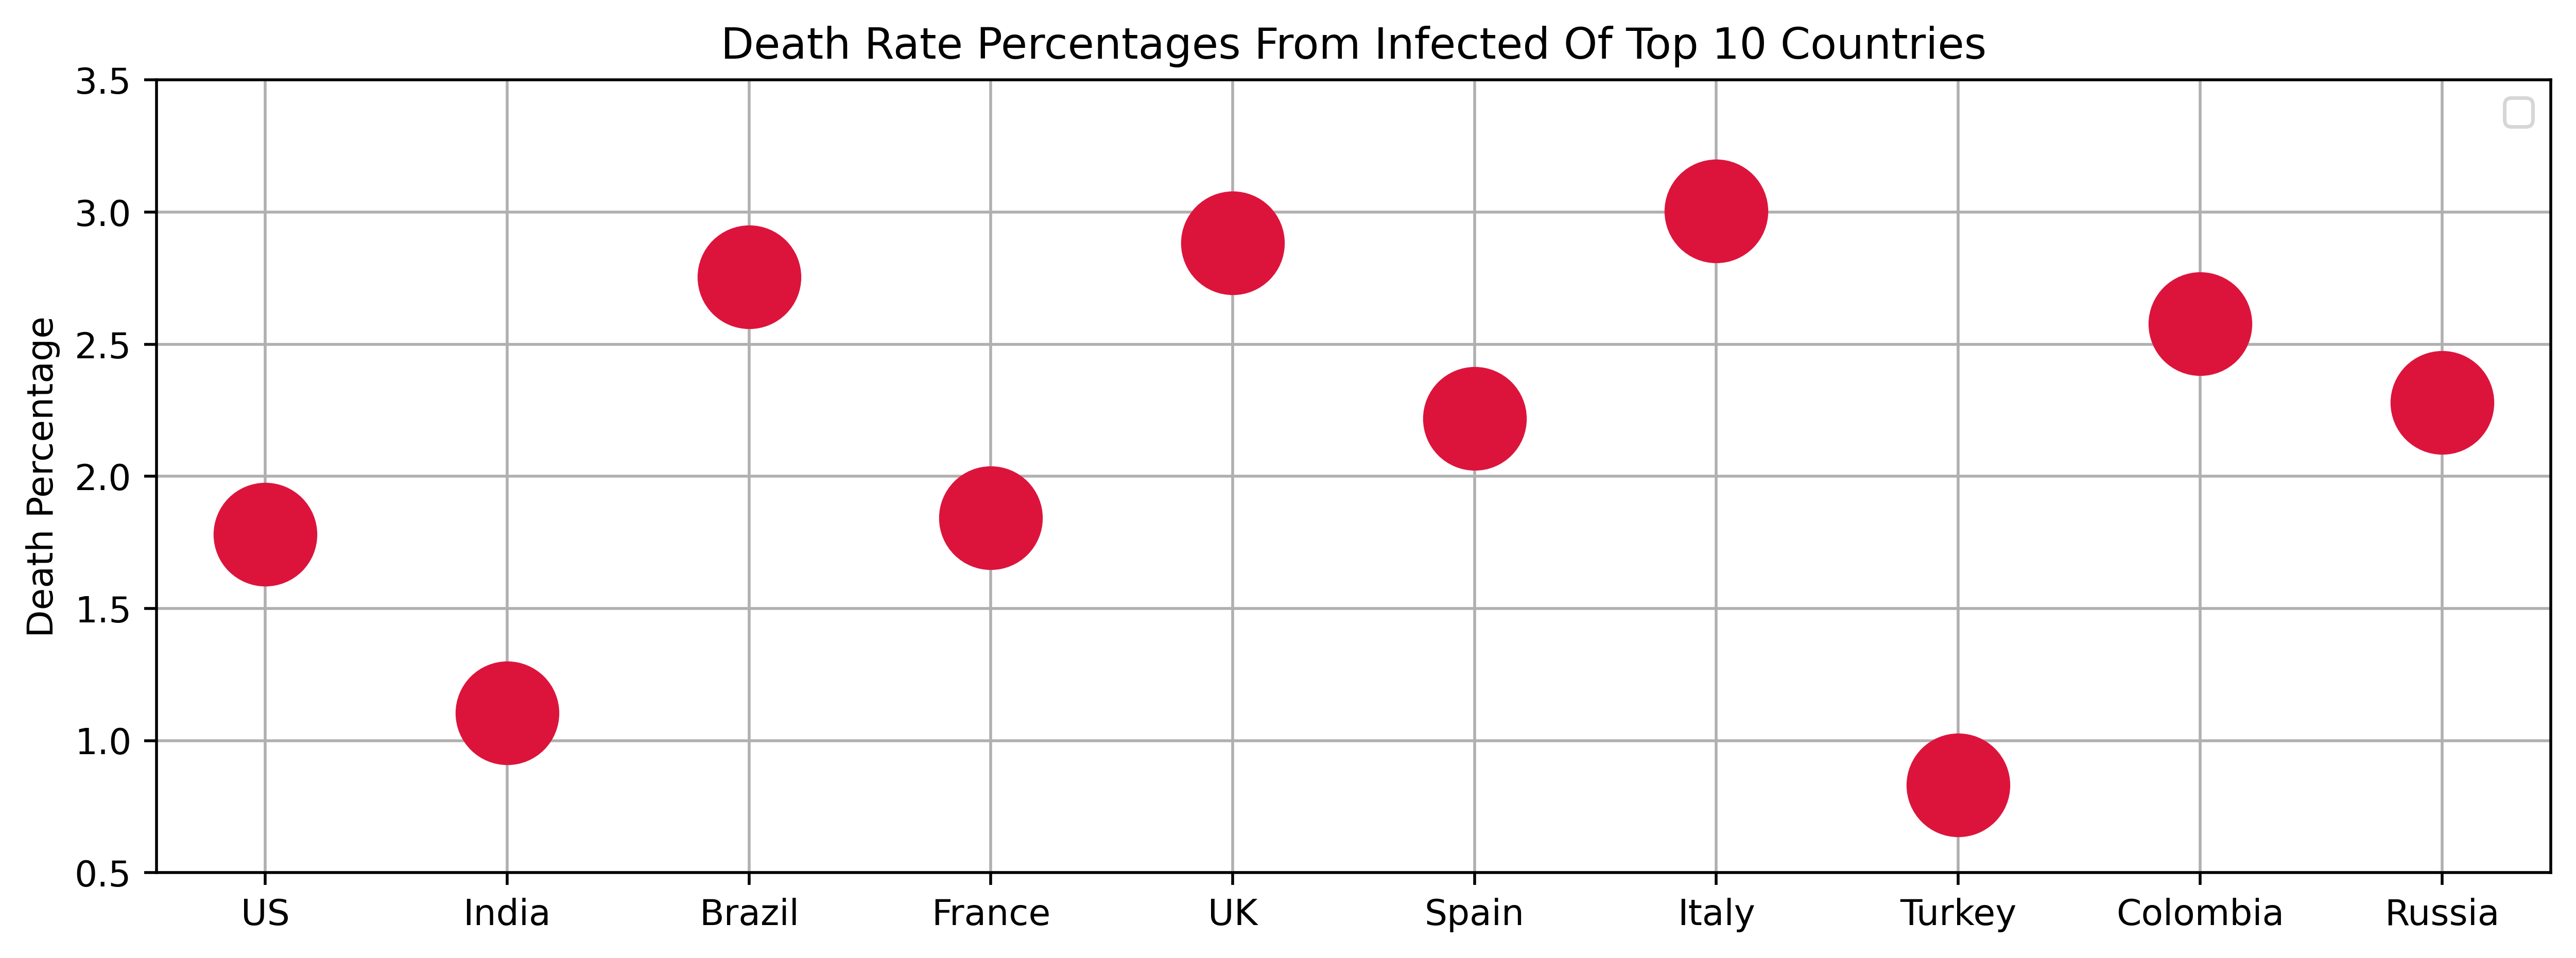

In [21]:
#DEATH RATE PERCENGTAGES OF TOP 10 COUNTRIES INFECTED WITH COVID 

US=q8[q8.location=='United States']['death_percentage'].mean() 
IND=q8[q8.location=='India']['death_percentage'].mean() 
BRA=q8[q8.location=='Brazil']['death_percentage'].mean() 
FRA=q8[q8.location=='France']['death_percentage'].mean() 
UK=q8[q8.location=='United Kingdom']['death_percentage'].mean()
SPAIN=q8[q8.location=='Spain']['death_percentage'].mean()
ITL=q8[q8.location=='Italy']['death_percentage'].mean()
TUR=q8[q8.location=='Turkey']['death_percentage'].mean()
COL=q8[q8.location=='Colombia']['death_percentage'].mean()
RUS=q8[q8.location=='Russia']['death_percentage'].mean()

#----------------------------------------------------------------------------------------------------------------------------
#GRAPHING

plt.figure(figsize=(12, 4), dpi=500)

x=plt.plot([US,IND,BRA,FRA,UK,SPAIN,ITL,TUR,COL,RUS],'ro', color='crimson', markersize=28)
plt.grid()

plt.ylabel('Death Percentage')
plt.xticks([0,1,2,3,4,5,6,7,8,9],['US','India','Brazil','France','UK','Spain','Italy','Turkey','Colombia','Russia'])
plt.yticks([0.5,1,1.5,2,2.5,3,3.5])
plt.title('Death Rate Percentages From Infected Of Top 10 Countries')

plt.legend()
plt.show()

***6:FINDING THE DEATH RATE PERCENTAGES OF INFECTED OCCURED IN ALL CONTINENTS:***

C:\Users\Maha Umer Farooq\AppData\Local\Temp\ipykernel_4036\1235362425.py:13: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot([africa,eur,NA,asia,ocenia,SA],'ro', color='crimson', markersize=27,)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


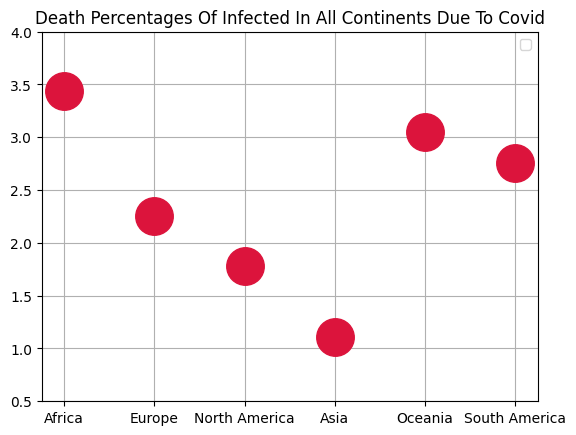

In [22]:
#FINDING THE DEATH RATE PERCENTAGES OF ALL THE DEATHS OCCURED IN EVERY CONTINENT

africa= q5.loc[q5.continent=='Africa']['death_rate_percentage'].mean()
eur= q5.loc[q5.continent=='Europe']['death_rate_percentage'].mean()
NA= q5.loc[q5.continent=='North America']['death_rate_percentage'].mean()
asia= q5.loc[q5.continent=='Asia']['death_rate_percentage'].mean()
ocenia= q5.loc[q5.continent=='Oceania']['death_rate_percentage'].mean()
SA= q5.loc[q5.continent=='South America']['death_rate_percentage'].mean()

#---------------------------------------------------------------------------------------------------------------------------plt.plot([shooting,spassing,dribbling,lpassing,ballcontrol,sprint,stamina,reaction,jumping,longshots,balance], marker='o', color='darkturquoise',markersize=8, label=a)
#GRAPHING

plt.plot([africa,eur,NA,asia,ocenia,SA],'ro', color='crimson', markersize=27,)
plt.xticks([0,1,2,3,4,5],['Africa','Europe','North America','Asia','Oceania','South America'])  
plt.yticks([0.5,1,1.5,2,2.5,3,3.5,4])
plt.title('Death Percentages Of Infected In All Continents Due To Covid')
plt.legend()
plt.grid()
plt.show()      


***7:DEATHS IN PAKISTAN IN 2020 AND 2021:***

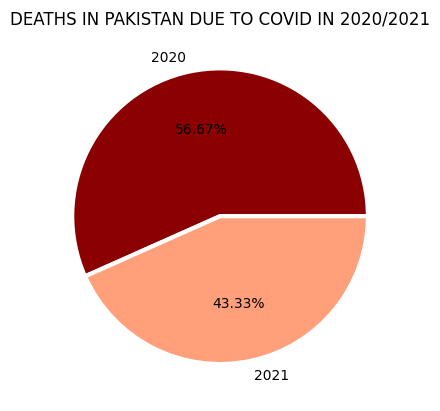

In [23]:
#MAKE A PIECHAART AND SEE IN WHICH YEAR MORE DEATHS HAPPENED IN PAKISTAN

deaths2020=q3['deaths_this_day'].sum()
deaths2021=q4['deaths_this_day'].sum()
labels=['2020','2021']
colors=['darkred', 'lightsalmon']
plt.pie([deaths2020,deaths2021], labels=labels, colors=colors, autopct='%.2f%%',wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('DEATHS IN PAKISTAN DUE TO COVID IN 2020/2021')
plt.show()


